# The Rhinovirus infection dataset

https://datadryad.org/stash/dataset/doi:10.5061/dryad.4xgxd25g1

In [1]:
import scanpy as sc
import numpy as np
from ndreamer import NDreamer

/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/xx244/.conda/envs/benchmark/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 12255 × 3608
    obs: 'batch', 'leiden', 'cell_type1021', 'perturbation'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell_type1021_colors', 'cell_type1021_sizes', 'hvg', 'leiden', 'log1p', 'neighbors', 'paga', 'pca', 'rank_genes_groups', 'tsne', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


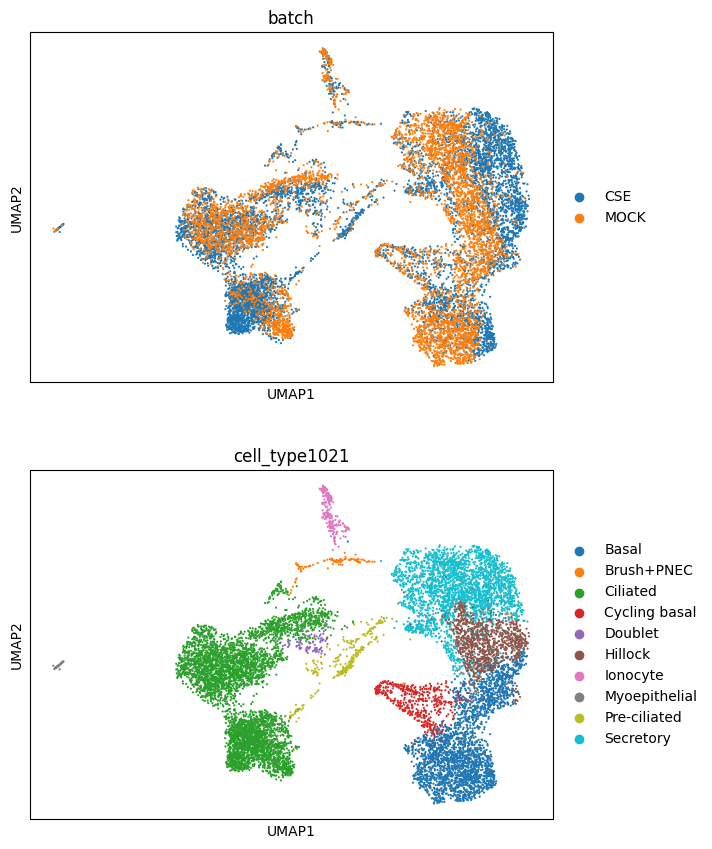

In [3]:
adata=sc.read_h5ad("../data/rvcse_221021.h5ad")
adata=adata[adata.obs["batch"].isin(['CSE',"MOCK"])].copy()
adata.obs["perturbation"]=adata.obs["batch"].copy()
print(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['batch', 'cell_type1021'],ncols=1)

# No independent loss

In [ ]:
adata=sc.read_h5ad("../data/rvcse_221021.h5ad")
adata=adata[adata.obs["batch"].isin(['CSE',"MOCK"])].copy()
adata.obs["perturbation"]=adata.obs["batch"].copy()
model = NDreamer(adata,condition_key="perturbation", contorl_name='MOCK', num_hvg=3608, require_batch=False,
                        batch_key=None,
                        resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=100, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=0, save_pth="./virus_noindependent/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path=None,
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

adata1=model.DL_model.adata.copy()
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['perturbation', 'cell_type1021'], ncols=1)

import rpy2.robjects as robjects
import anndata2ri
anndata2ri.activate()
# Add your library path
library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
# Update R's library paths
robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
# Verify the updated library paths
print(robjects.r('.libPaths()'))
from metrics import calculate_metrics
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
calculate_metrics(adata1, batch_key='perturbation', celltype_key='cell_type1021', all=True, n_neighbors=15, embed='X_effect_modifier_space_PCA')

# No dependent loss

In [ ]:
adata=sc.read_h5ad("../data/rvcse_221021.h5ad")
adata=adata[adata.obs["batch"].isin(['CSE',"MOCK"])].copy()
adata.obs["perturbation"]=adata.obs["batch"].copy()
model = NDreamer(adata, condition_key="perturbation", contorl_name='MOCK', num_hvg=3608, require_batch=False,
                        batch_key=None,
                        resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=100, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./virus_nodependent/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path=None,
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=0,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

adata1=model.DL_model.adata.copy()
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['perturbation', 'cell_type1021'], ncols=1)

import rpy2.robjects as robjects
import anndata2ri
anndata2ri.activate()
# Add your library path
library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
# Update R's library paths
robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
# Verify the updated library paths
print(robjects.r('.libPaths()'))
from metrics import calculate_metrics
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
calculate_metrics(adata1, batch_key='perturbation', celltype_key='cell_type1021', all=True, n_neighbors=15, embed='X_effect_modifier_space_PCA')

# No triplet loss

In [ ]:
adata=sc.read_h5ad("../data/rvcse_221021.h5ad")
adata=adata[adata.obs["batch"].isin(['CSE',"MOCK"])].copy()
adata.obs["perturbation"]=adata.obs["batch"].copy()
model = NDreamer(adata, condition_key="perturbation", contorl_name='MOCK', num_hvg=3608, require_batch=False,
                        batch_key=None,
                        resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=100, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./virus_notriplet/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path=None,
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=0, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=20)

model.train_model()
model.get_modifier_space()

adata1=model.DL_model.adata.copy()
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['perturbation', 'cell_type1021'], ncols=1)

import rpy2.robjects as robjects
import anndata2ri
anndata2ri.activate()
# Add your library path
library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
# Update R's library paths
robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
# Verify the updated library paths
print(robjects.r('.libPaths()'))
from metrics import calculate_metrics
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
calculate_metrics(adata1, batch_key='perturbation', celltype_key='cell_type1021', all=True, n_neighbors=15, embed='X_effect_modifier_space_PCA')

# No local neighborhood loss

In [ ]:
adata=sc.read_h5ad("../data/rvcse_221021.h5ad")
adata=adata[adata.obs["batch"].isin(['CSE',"MOCK"])].copy()
adata.obs["perturbation"]=adata.obs["batch"].copy()
model = NDreamer(adata, condition_key="perturbation", contorl_name='MOCK', num_hvg=3608, require_batch=False,
                        batch_key=None,
                        resolution_low=0.5, resolution_high=7, cluster_method="Leiden", embedding_dim=512,
                            codebooks=[1024 for i in range(32)],
                            codebook_dim=8, encoder_hidden=[1024, 512], decoder_hidden=[512, 1024], z_dim=256,
                            cos_loss_scaler=20, random_seed=123, batch_size=1024, epoches=100, lr=1e-3,
                            triplet_margin=5,independent_loss_scaler=1000, save_pth="./virus_noneighbor/",
                            developer_test_mode=False,
                            library_size_normalize_adata=False,
                            save_preprocessed_adata_path=None,
                            KL_scaler=5e-3, reconstruct_scaler=1, triplet_scaler=5, num_triplets_per_label=15,
                            tau=0.01, commitment_loss_scaler=1, cluster_correlation_scaler=50,reset_threshold=1/1024,
                            reset_interval=30,try_identify_cb_specific_subtypes=False,
                            local_neighborhood_loss_scaler=1,local_neighbor_sigma=1,
                            try_identify_perturb_escaped_cell=False,n_neighbors=20,
                            local_neighbor_across_cluster_scaler=0)

model.train_model()
model.get_modifier_space()

adata1=model.DL_model.adata.copy()
sc.pp.neighbors(adata1, use_rep='X_effect_modifier_space_PCA', n_neighbors=25)
sc.tl.umap(adata1)
sc.pl.umap(adata1, color=['perturbation', 'cell_type1021'], ncols=1)

import rpy2.robjects as robjects
import anndata2ri
anndata2ri.activate()
# Add your library path
library_path = "/gpfs/gibbs/project/wang_zuoheng/xx244/R/4.3/"  # Replace with the actual path
# Update R's library paths
robjects.r(f'.libPaths(c("{library_path}", .libPaths()))')
# Verify the updated library paths
print(robjects.r('.libPaths()'))
from metrics import calculate_metrics
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)
calculate_metrics(adata1, batch_key='perturbation', celltype_key='cell_type1021', all=True, n_neighbors=15, embed='X_effect_modifier_space_PCA')